<br>

# **SISTEMA DE DETECCIÓN DE FRAUDE BANCARIO**

**PROYECTO FINAL**

<br>

## **ÍNDICE**

- **PASO 1: DEFINCIÓN DEL PROBLEMA**
- **PASO 2: RECOLECCIÓN DE DATOS**
- **PASO 3: EXPLORACIÓN Y PROCESAMIENTO DE DATOS**
- **PASO 4: DIVISIÓN DEL CONJUNTO DE DATOS E INGENIERÍA DE CARACTERÍSTICAS**
- **PASO 5: CREACIÓN DEL MODELO**
- **PASO 6: ENTRENAMIENTO DEL MODELO**
- **PASO 7: GRÁFICO**
- **PASO 8: EVALUACIÓN DE MODELO**
- **PASO 9: GUARDAR MODELO**

<br>

<br>

# **PASO 1: DEFINICIÓN DEL PROBLEMA**


El fraude bancario representa una amenaza significativa para las instituciones financieras, resultando en pérdidas económicas sustanciales y afectando negativamente la confianza de los clientes. La detección temprana y precisa de actividades fraudulentas es esencial para mitigar estos riesgos. El objetivo de este proyecto es desarrollar un modelo de aprendizaje automático que identifique transacciones fraudulentas utilizando el "Bank Account Fraud Dataset Suite (NeurIPS 2022)" disponible en Kaggle. 

Para nuestro cometido debemos seleccionar un dataset que cumpla con los siguientes requisitos:

- Mínimo: 60,000 filas.
- 20 variables predictoras (al menos 1 categórica).


**Descripción del Dataset escogido:**

Los datos pertenecen a un Dataset de la empresa **Feedzai**. 

Feedzai es una empresa portuguesa de ciencia de datos, que se especializa en desarrollar herramientas de aprendizaje automático en tiempo real para identificar transacciones de pago fraudulentas y minimizar riesgos en los sectores de servicios financieros, comercio minorista y comercio electrónico. Su plataforma utiliza inteligencia artificial avanzada para analizar grandes volúmenes de datos y detectar patrones de fraude, como el robo de identidad, fraude con tarjetas de crédito y estafas en línea.

En nuestro caso en particular, el conjunto de datos seleccionado proporciona información tabular sobre transacciones bancarias, incluyendo características relevantes para la identificación de fraudes. Este dataset ha sido diseñado para evaluar modelos de aprendizaje automático en contextos de datos sesgados, desbalanceados y dinámicos. 


<br>

# **PASO 2: RECOLECCIÓN DE DATOS**

**IMPORTACIÓN DE LIBRERÍAS**

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import chi2
from sklearn.exceptions import NotFittedError

# modelado
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random


import joblib
import zipfile


<br>

**DESCARGAR EL DATSET DESDE LA API DE KAGGLE**

In [3]:
# Identificador del conjunto de datos de Kaggle
identificador_conjunto_datos = "sgpjesus/bank-account-fraud-dataset-neurips-2022"

try:
    # Descargar el conjunto de datos usando la API de Kaggle
    os.system(f'kaggle datasets download -d {identificador_conjunto_datos}')
    print("Dataset descargado exitosamente.")
except Exception as e:
    print(f"Error al descargar el dataset: {e}")

Dataset URL: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022
License(s): CC-BY-NC-SA-4.0
bank-account-fraud-dataset-neurips-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset descargado exitosamente.


<br>

**EXTRACCIÓN DEL SELECTIVA DEL DATASET "Base.csv"**

In [ ]:

# Identificador del conjunto de datos de Kaggle
identificador_conjunto_datos = "sgpjesus/bank-account-fraud-dataset-neurips-2022"

try:
    # Descargar el conjunto de datos usando la API de Kaggle
    os.system(f'kaggle datasets download -d {identificador_conjunto_datos}')
    print("Dataset descargado exitosamente.")

    # Obtener la ruta del archivo zip descargado
    ruta_archivo_zip = f"{identificador_conjunto_datos.split('/')[1]}.zip"  # Ajusta el nombre del archivo zip si es diferente

    # Extraer solo el archivo Base.csv
    with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
        archivo_zip.extract('Base.csv', path='.')  # Extrae Base.csv al directorio actual

    print("Archivo Base.csv extraído exitosamente.")

except Exception as e:
    print(f"Error al procesar el dataset: {e}")

Dataset URL: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022
License(s): CC-BY-NC-SA-4.0
bank-account-fraud-dataset-neurips-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset descargado exitosamente.
Archivo Base.csv extraído exitosamente.


<br>

**LECTURA Y VISUALIZACIÓN DEL DATASET**

In [5]:
df = pd.read_csv("Base.csv")
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


<br>

**VISUALIZACIÓN DE DATOS**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

<br>

**VALORES DISTINTOS POR COLUMNA**

In [7]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

<br>

**RESUMEN ESTADÍSTICO DEL DATAFRAME**

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


<br>

**DIMENSIONES DEL DATAFRAME**

In [9]:
print(" ")
print(f"EL DATAFRAME ORIGINAL TIENE UNA MATRIZ DE:", df.shape)

 
EL DATAFRAME ORIGINAL TIENE UNA MATRIZ DE: (1000000, 32)


<br>

**NÚMERO DE FILAS DUPLICADAS**

In [10]:
duplicados = df.duplicated()
numeros_duplicados = duplicados.sum()
print(numeros_duplicados)

0


**REDUCCIÓN DE DATOS**

- El objetivo de este paso es reducir el tamaño del Dataset para optimizar el espacio del repositorio. 
- Pasamos de 1'000.000 de filas a 100.000
- Se ha priorizado la eliminazión de filas **`NO FRAUDE`**, dado que lo más importante es que el modelo aprenda lo que es un **`"FRAUDE"`**



In [15]:
# Cargar el dataset
df1 = pd.read_csv('Base.csv')

# Filtrar las filas donde fraud_bool es 0
zero_fraud_df = df[df['fraud_bool'] == 0]

# Contar cuántas filas tienen fraud_bool igual a 0
num_zero_fraud = len(zero_fraud_df)

if num_zero_fraud <= 900000:
    # Si hay menos o igual a 900,000 filas, eliminamos todas
    df = df[df['fraud_bool'] != 0]
else:
    # Si hay más de 900,000 filas, eliminamos una muestra de 900,000 filas
    zero_fraud_sample = zero_fraud_df.sample(n=900000, replace=False)
    df = df.drop(zero_fraud_sample.index)

# Guardar el dataframe resultante en un nuevo archivo CSV
df.to_csv('Base_100milfilas.csv', index=False)

print(f"{min(num_zero_fraud, 900000)} filas con fraud_bool 0 han sido eliminadas y guardadas en 'Base_100milfilas.csv'.")

900000 filas con fraud_bool 0 han sido eliminadas y guardadas en 'Base_100milfilas.csv'.


<br>

**VISUALIZACIÓN DEL DATASET CON REDUCCIÓN DE DATOS**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

**VISUALIZACIÓN DE LA COLUMNA `FRAUDE`**

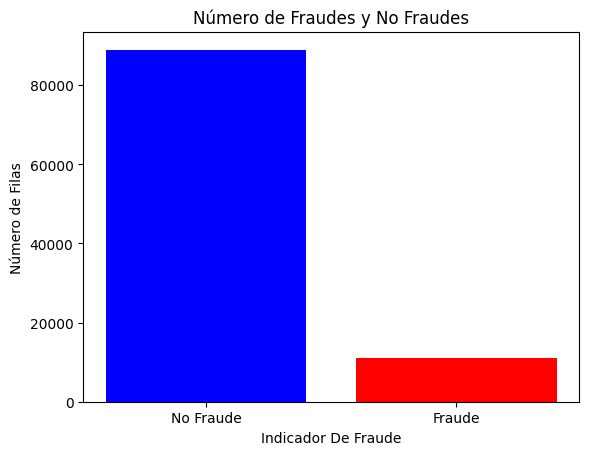

In [12]:
# Cargar el dataset
df = pd.read_csv('Base_100milfilas.csv')

# Contar el número de filas con 0 y 1 en la columna fraud_bool
fraud_bool_counts = df['fraud_bool'].value_counts()

# Crear un gráfico de barras
plt.bar(fraud_bool_counts.index, fraud_bool_counts.values, color=['blue', 'red'])
plt.xlabel('Indicador De Fraude')
plt.ylabel('Número de Filas')
plt.title('Número de Fraudes y No Fraudes')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

<br>

# **PASO 3: EXPLORACIÓN Y PROCESAMIENTO DE DATOS**

<br>

**NÚMERO DE FILAS DUPLICADAS**

(NUEVO DATASET)

In [13]:
duplicados = df.duplicated()
numero_de_duplicados = duplicados.sum()
print(f"LOS NUMEROS DUPLICADOS DEL DATASET SON: {numero_de_duplicados}")

LOS NUMEROS DUPLICADOS DEL DATASET SON: 0


<br>

**CONTEO DE VALORES NULOS (NaN) POR COLUMNA**

In [15]:
# Se realiza un conteo de los valores 'NaN' por columna para identificar dónde se requiere reemplazo
nan_counts = df.isna().sum() 
print("CONTEO DE LOS 'NaN' POR COLUMNAS:") 
nan_counts

CONTEO DE LOS 'NaN' POR COLUMNAS:


fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

<br>

**IDENTIFICACIÓN DE VALORES FALTANTES**

In [16]:
Valores_faltantes = df.isnull().sum() 
print("Valores faltantes por columna:\n", Valores_faltantes)

Valores faltantes por columna:
 fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source            

# #

# **"#"**

In [17]:
print("----------------(7). ORDENO LAS COLUMNAS CON LOS VALORES NULOS-----------------\n")
df.isnull().sum().sort_values(ascending=False)

----------------(7). ORDENO LAS COLUMNAS CON LOS VALORES NULOS-----------------



fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

<br>

**DISTRIBUCIÓN DE VARIABLES NUMÉRICAS MEDIANTE HISTOGRAMAS**

<Figure size 1500x1000 with 0 Axes>

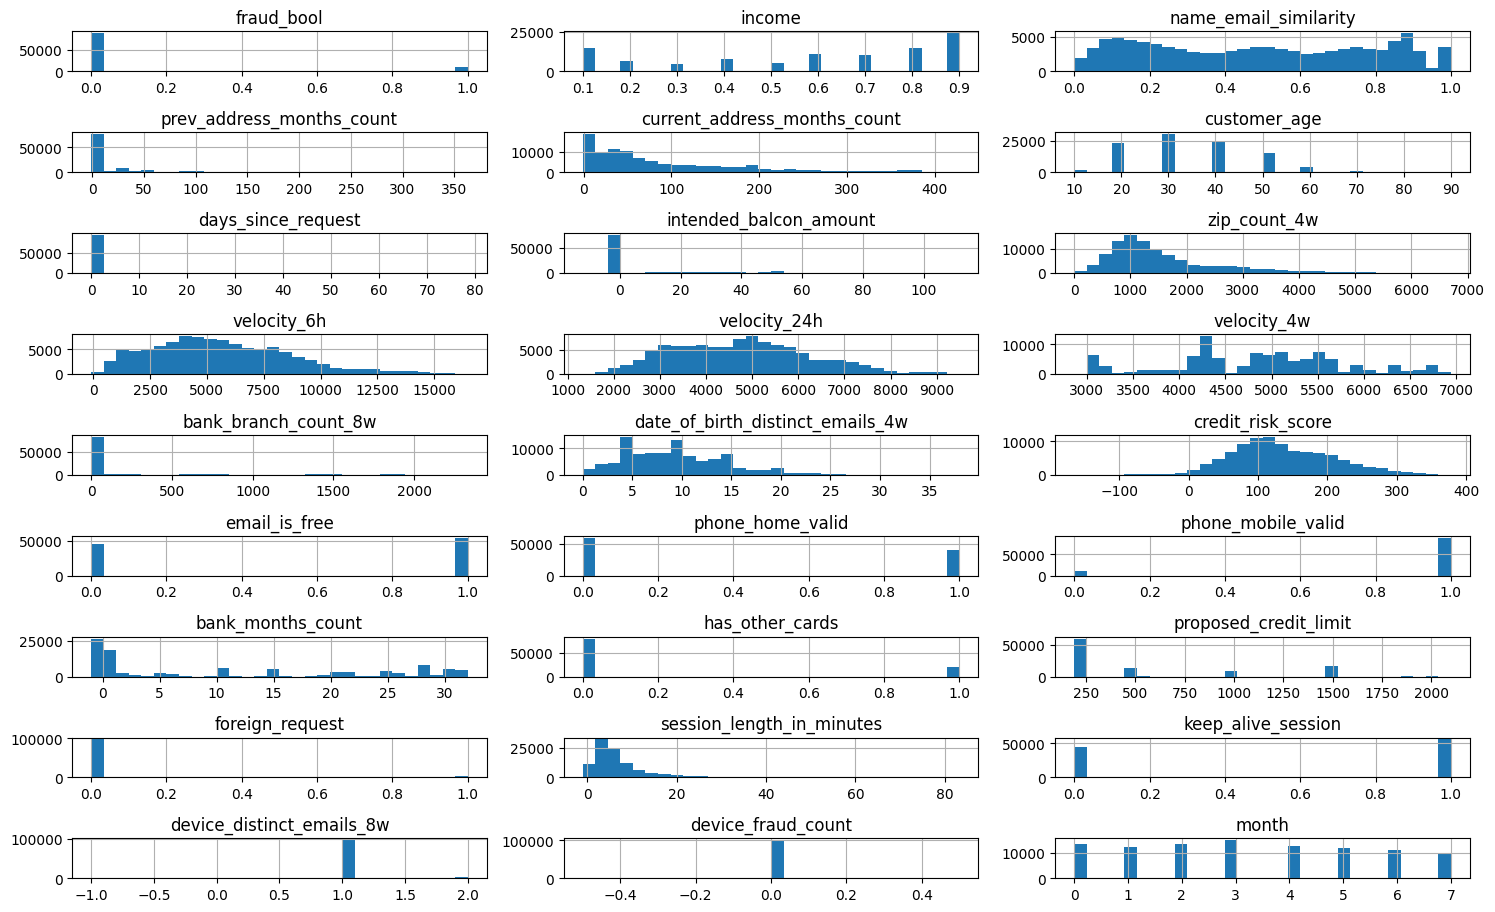

In [25]:
# Seleccionar todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Ajustar el tamaño de la figura para que se ajuste a la pantalla de salida
plt.figure(figsize=(15, 10))

# Distribuciones de las variables numéricas
df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(len(numeric_cols)//3 + 1, 3))
plt.tight_layout()
plt.show()


<br>

**MATRIX DE CORRELACIÓN DE VARIABLES NUMÉRICO-NUMÉRICO**

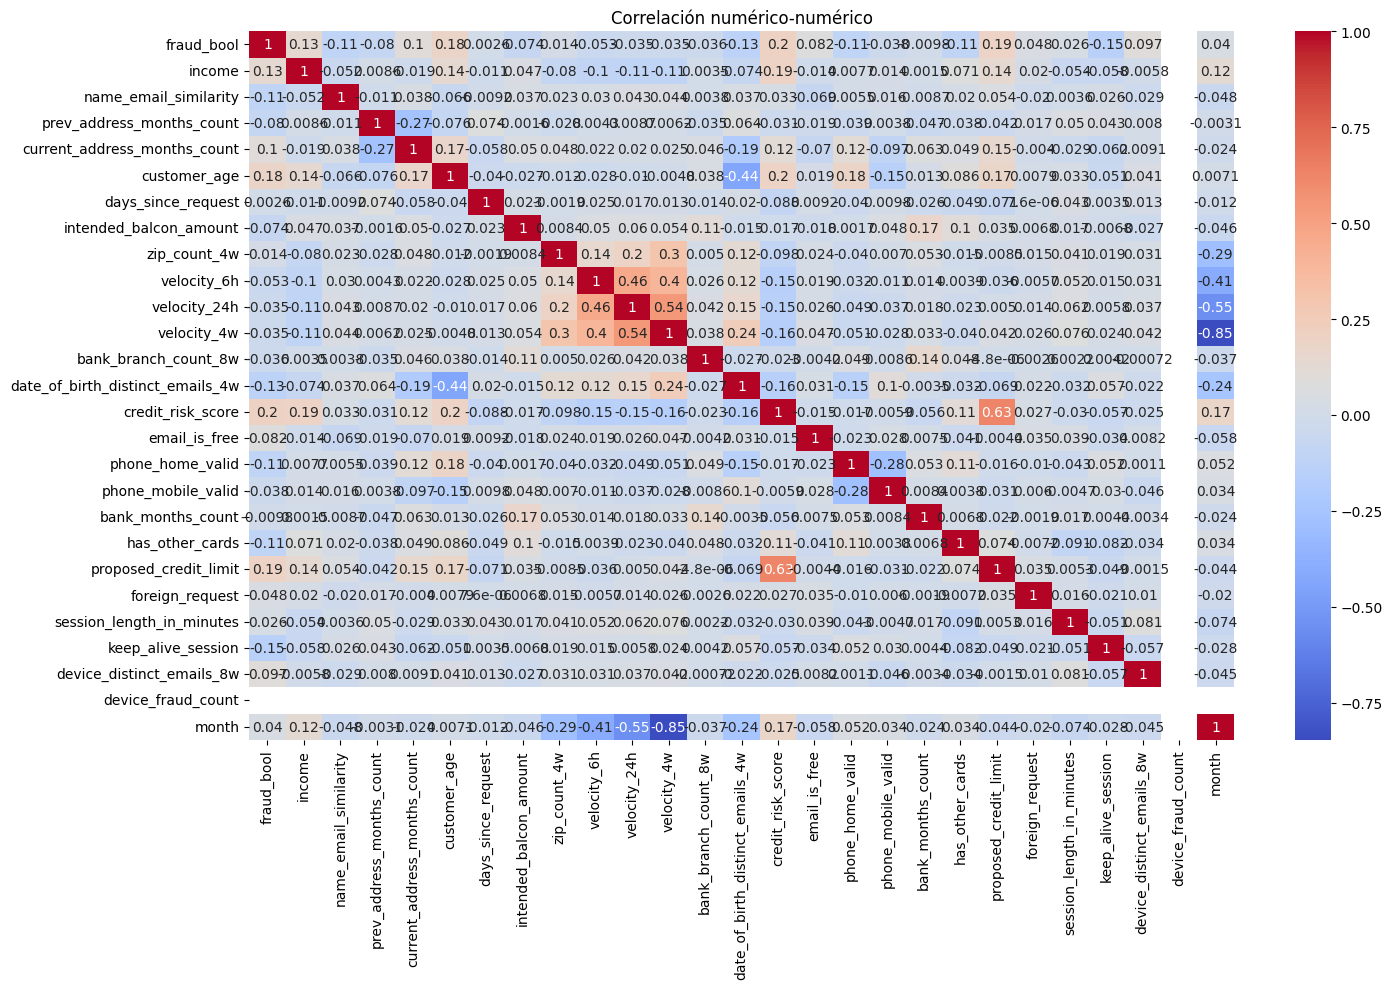

In [22]:
# Ajustar el tamaño de la figura para que se ajuste a la pantalla de salida
plt.figure(figsize=(15, 10))

# Mapa de calor de la correlación
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlación numérico-numérico")
plt.tight_layout()
plt.show()


<br>

**GRÁFICOS BOXPLOT PARA DETALLAR OUTLIERS**

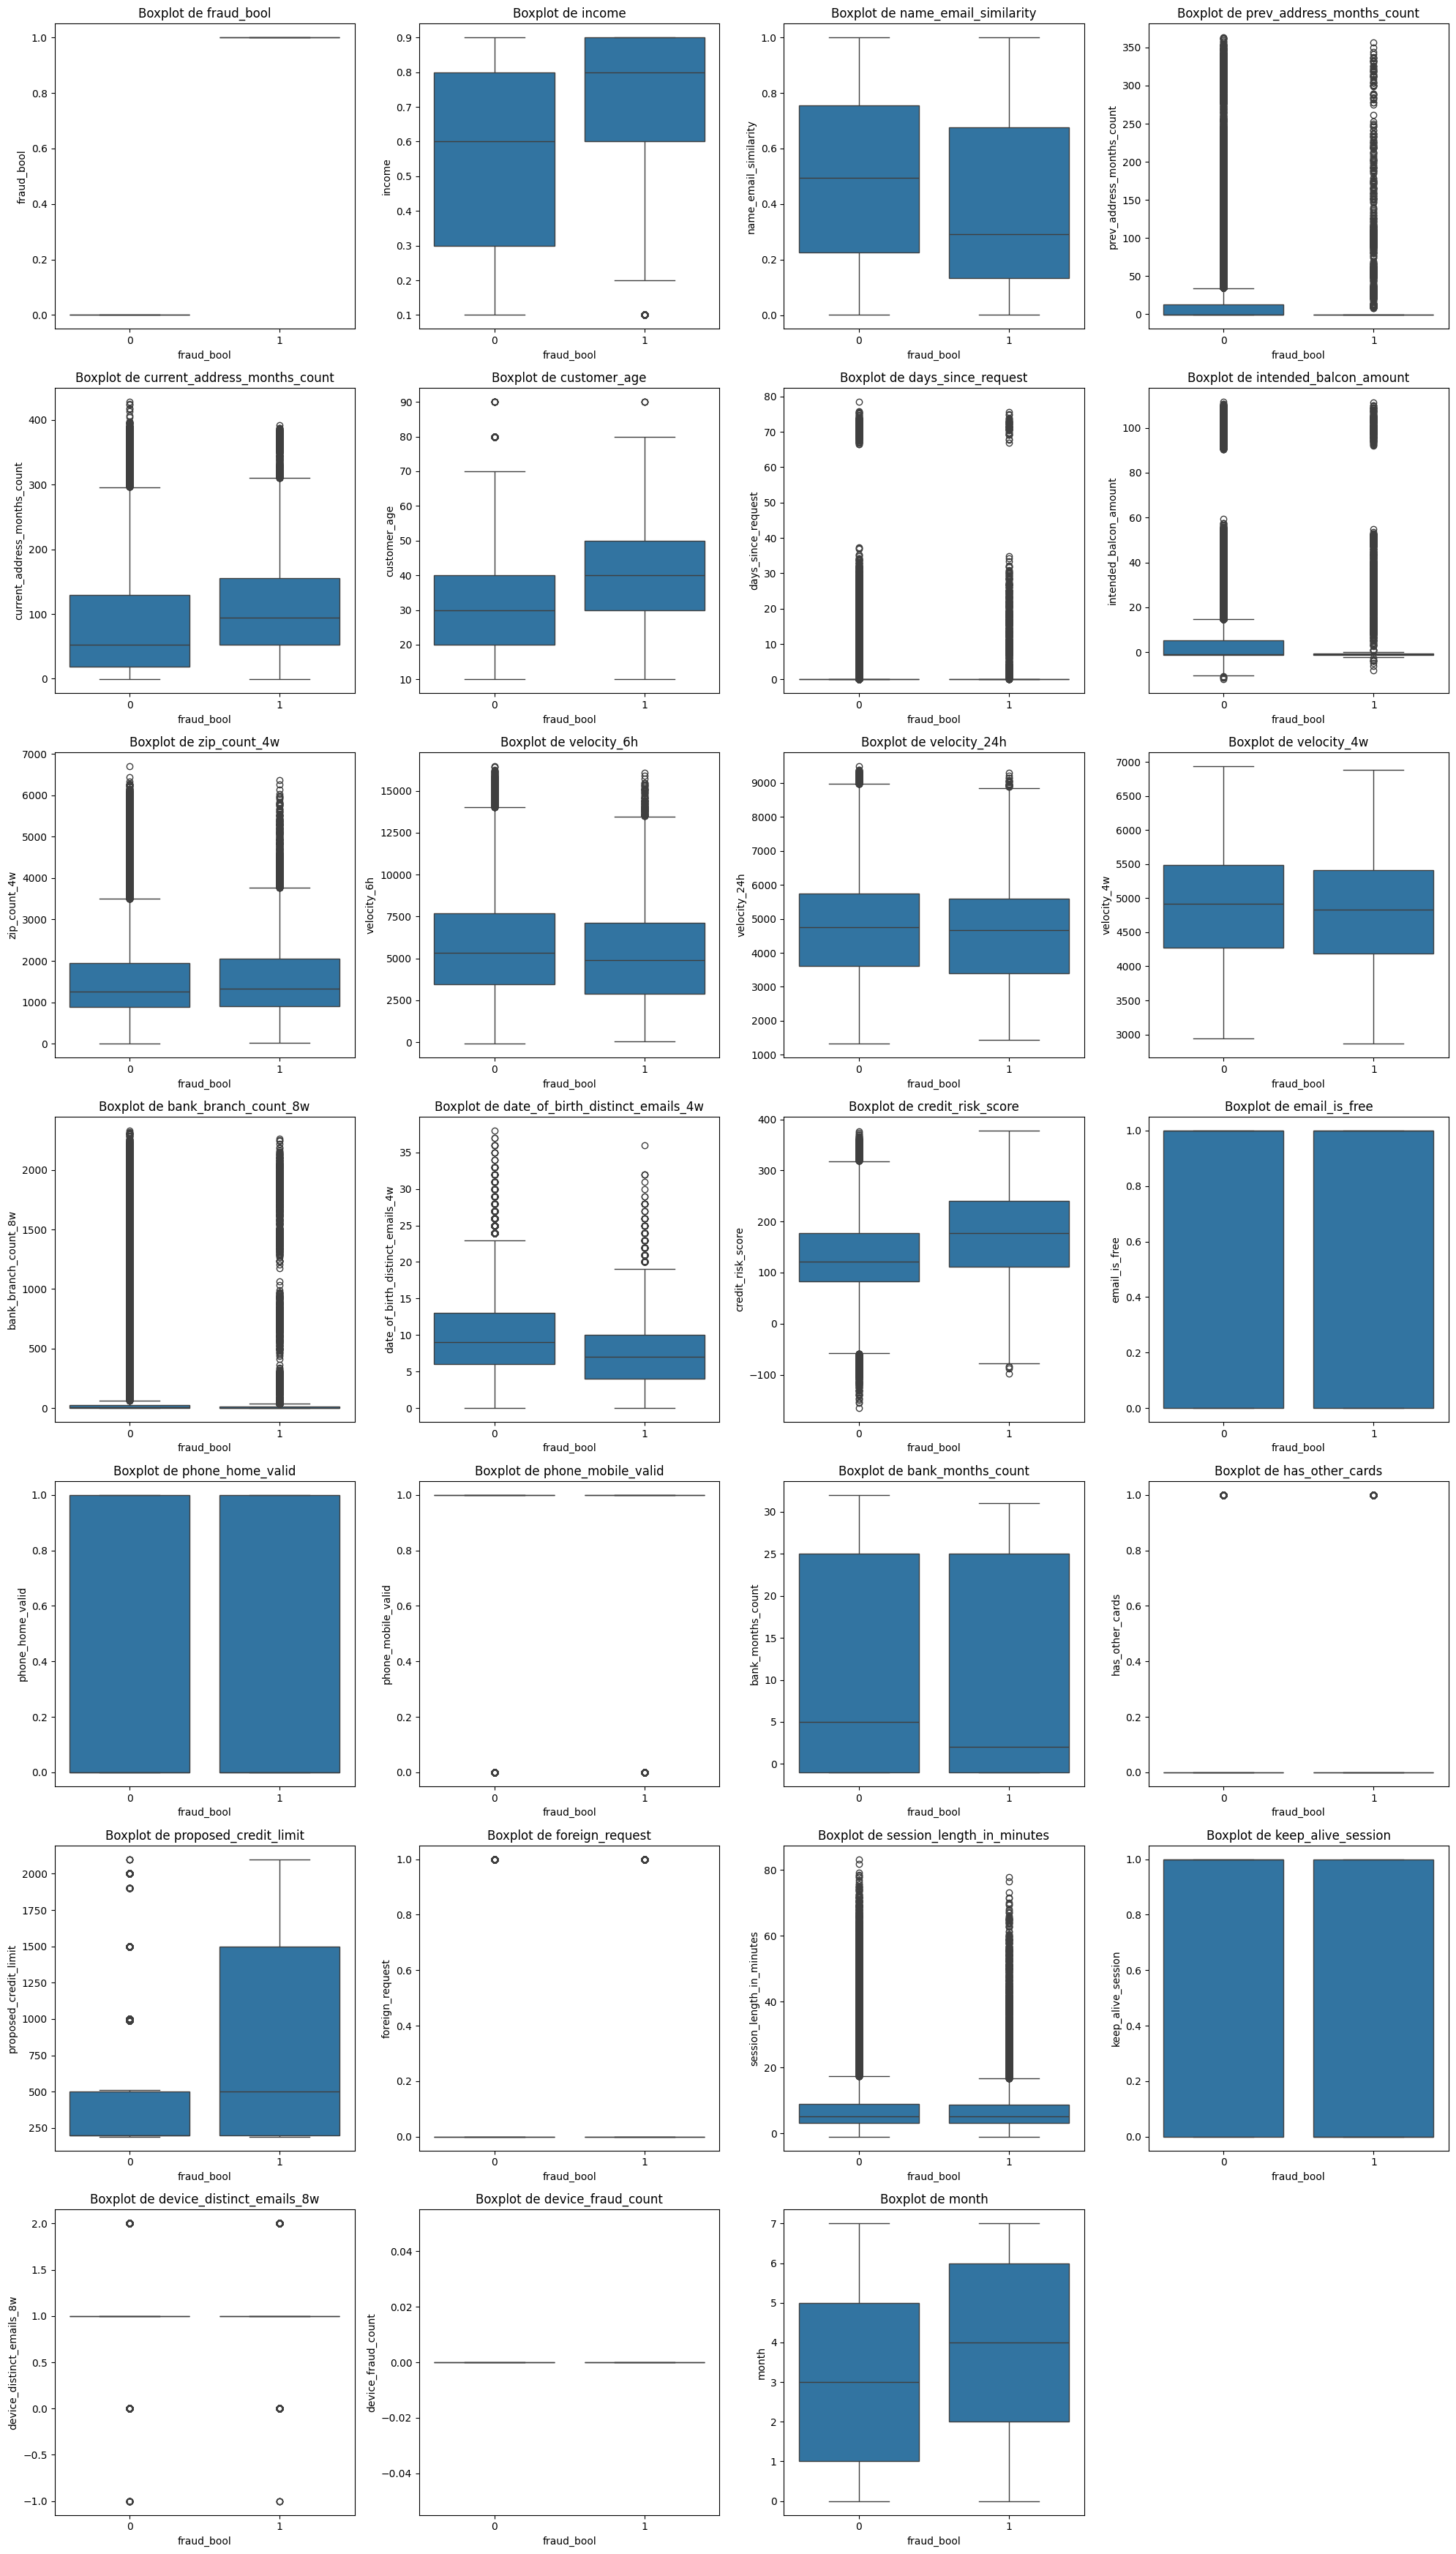

In [26]:

# Seleccionar todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular el número de filas necesarias
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Crear subplots dinámicos
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))

# Grafico boxplots para cada variable
for i, var in enumerate(numeric_cols):
    sns.boxplot(x='fraud_bool', y=var, data=df, ax=axes[i//n_cols, i%n_cols])
    axes[i//n_cols, i%n_cols].set_title(f'Boxplot de {var}')

# Eliminar subplots vacíos
for j in range(len(numeric_cols), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


<br>

# **PASO 4: DIVISIÓN DEL CONJUNTO DE DATOS E INGENIERÍA DE CARACTERÍSTICAS**

<br>

**DIVISIÓN DEL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA**

In [27]:
# Divido el conjunto de datos en muestras de train y test
X = df.drop("fraud_bool", axis = 1)
y = df["fraud_bool"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
75220,0.8,0.217730,-1,62,30,0.008729,-0.460535,AA,759,6142.797004,...,1,1000.0,0,INTERNET,5.734787,other,1,1,0,5
48955,0.6,0.549280,47,3,30,0.011860,-0.897206,AB,1449,3500.874558,...,1,200.0,0,INTERNET,1.819091,windows,0,1,0,3
44966,0.1,0.576052,-1,57,30,0.001855,-1.458908,AB,3038,5611.411913,...,1,1500.0,1,INTERNET,3.571076,windows,0,1,0,3
13568,0.9,0.629600,-1,99,20,0.014376,-0.585295,AB,941,6922.357882,...,0,200.0,0,INTERNET,1.134986,other,1,1,0,1
92727,0.4,0.997746,-1,264,20,0.004984,-1.203213,AB,1126,3648.609861,...,0,200.0,1,INTERNET,5.558004,other,1,1,0,7


<br>

**ESCALADO DE VARIABLES NUMÉRICAS CON `StandardScaler`**

- Identificamos y escalamos las variables numéricas, excluyendo la "VARIABLE OBJETIVO": **`fraud_bool`**

In [28]:
# Identifico las variables numéricas automáticamente, excluyendo 'fraud_bool' 
variables_numericas = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'fraud_bool']

# Instancio el escalador
scaler = StandardScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# Aplico el escalador en los datos de entrenamiento
X_train_final = scaler.transform(X_train[variables_numericas])
X_train_final = pd.DataFrame(X_train_final, index=X_train.index, columns=variables_numericas)

# Aplico el escalador en los datos de prueba
X_test_final = scaler.transform(X_test[variables_numericas])
X_test_final = pd.DataFrame(X_test_final, index=X_test.index, columns=variables_numericas)

# Muestro las primeras filas de los datos escalados de entrenamiento
print(X_train_final.head())

         income  name_email_similarity  prev_address_months_count  \
75220  0.773360              -0.913643                  -0.387171   
48955  0.083353               0.223861                   0.726390   
44966 -1.641664               0.315712                  -0.387171   
13568  1.118363               0.499428                  -0.387171   
92727 -0.606654               1.762487                  -0.387171   

       current_address_months_count  customer_age  days_since_request  \
75220                     -0.311241     -0.354986           -0.190320   
48955                     -0.975775     -0.354986           -0.189731   
44966                     -0.367557     -0.354986           -0.191614   
13568                      0.105501     -1.163105           -0.189258   
92727                      1.963945     -1.163105           -0.191025   

       intended_balcon_amount  zip_count_4w  velocity_6h  velocity_24h  ...  \
75220               -0.433004     -0.814648     0.169370     -0.600

<br>

**IDENTIFICACIÓN DE VARIABLES CATEGÓRICAS EN TODO EL DATASET**

In [29]:
# Identificamos variables categóricas automáticamente, como en este no hay, aparecen en cero.
columnas_categoricas = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]

print("Variables categóricas:")
print(columnas_categoricas)

Variables categóricas:
['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


<br>

**SELECCIÓN DE LAS MEJORES CARÁCTERÍSTICAS DEL DATASET**


- Este código realiza una selección de las 20 mejores características (variables) de un conjunto de datos de entrenamiento (`X_train_final`) para un problema de clasificación.  
- Utiliza la función `f_classif` (ANOVA unidireccional) para evaluar la importancia de cada característica y `SelectKBest` para seleccionar las 20 mejores. 
- Luego, aplica esta selección tanto al conjunto de entrenamiento como al de prueba (`X_test_final`), creando nuevos DataFrames (`X_train_sel` y `X_test_sel`) que contienen solo las características seleccionadas.
- Finalmente, se muestra `X_train_sel`.

In [30]:
# Con un valor de k = 20
selection_model = SelectKBest(score_func=f_classif, k = 20)

# entreno la selecciòn
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,velocity_6h,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,keep_alive_session,device_distinct_emails_8w,month
0,0.773360,-0.913643,-0.387171,-0.311241,-0.354986,-0.433004,0.169370,-0.600590,-0.381575,-0.852713,1.096058,-1.095076,-0.815923,0.361693,1.950295,0.868495,-0.170231,0.899747,-0.122284,0.759094
1,0.083353,0.223861,0.726390,-0.975775,-0.354986,-0.454793,-0.707655,-0.344105,1.566012,0.338837,-0.771794,-1.095076,1.225606,-2.764774,1.950295,-0.678586,-0.170231,-1.111423,-0.122284,-0.141353
2,-1.641664,0.315712,-0.387171,-0.367557,-0.354986,-0.482820,-0.007031,-0.628293,0.052434,0.934612,0.916191,0.913178,-0.815923,0.361693,1.950295,1.835420,5.874369,-1.111423,-0.122284,-0.141353
3,1.118363,0.499428,-0.387171,0.105501,-1.163105,-0.439229,0.428157,-0.344490,-0.331413,0.934612,-0.937825,0.913178,1.225606,0.361693,-0.512743,-0.678586,-0.170231,0.899747,-0.122284,-1.041801
4,-0.606654,1.762487,-0.387171,1.963945,-1.163105,-0.470062,-0.658612,-0.971311,-0.370670,0.338837,-0.370551,-1.095076,1.225606,0.361693,-0.512743,-0.678586,5.874369,0.899747,-0.122284,1.659542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.773360,0.451531,-0.387171,1.186778,1.261251,-0.427864,-0.216899,0.363727,-0.292156,1.331795,1.289761,0.913178,1.225606,0.361693,1.950295,1.835420,-0.170231,0.899747,-0.122284,-1.492025
79996,0.428356,1.363746,-0.387171,0.465927,-0.354986,-0.455647,-0.515312,0.016706,-0.394661,0.140245,-0.730286,-1.095076,-0.815923,0.361693,1.950295,-0.678586,-0.170231,-1.111423,-0.122284,0.308870
79997,-0.606654,0.648038,-0.387171,-0.367557,0.453132,-0.456592,0.020924,0.794379,-0.370670,-0.455529,1.455793,-1.095076,-0.815923,0.361693,-0.512743,1.835420,-0.170231,0.899747,-0.122284,0.759094
79998,1.118363,-1.468137,-0.387171,0.634876,0.453132,0.588035,1.484914,1.150185,-0.351042,-0.256938,0.072199,0.913178,-0.815923,0.361693,1.950295,1.835420,-0.170231,0.899747,-0.122284,-1.492025


<br>

**OBTENCIÓN DE LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERÍSTICAS**

- Este código toma los resultados de un modelo de selección de características (`selection_model`), específicamente las puntuaciones de importancia y las características seleccionadas, y los organiza en un DataFrame para su mejor visualización.

In [31]:
print("OBTENCIÓN DE LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS:")

# Obtengo las puntuaciones y las características seleccionadas 
scores = selection_model.scores_ 
selected_indices = selection_model.get_support(indices=True) 
selected_features = X.columns[selected_indices] 

# Creo un DataFrame con las características y sus puntuaciones 
scores_df = pd.DataFrame({'Características': selected_features, 'Puntuaciones': scores[selected_indices]}) 
scores_df = scores_df.sort_values(by='Puntuaciones', ascending=False) 

# Muestro las 20 mejores características con sus puntuaciones 

scores_df

OBTENCIÓN DE LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS:


,Características,Puntuaciones
10,date_of_birth_distinct_emails_4w,3534.237440
15,phone_mobile_valid,3228.310521
4,customer_age,2888.058581
17,proposed_credit_limit,1866.316489
0,income,1463.321506
9,bank_branch_count_8w,1398.022948
1,name_email_similarity,978.033682
14,phone_home_valid,942.074724
12,credit_risk_score,907.608649
3,current_address_months_count,840.820187


<br>

# **PASO 5: CREACIÓN DEL MODELO**

<br>

**CONFIGURACIÓN DEL MODELO `ÁRBOL DE DECISIÓN` CON SEMILLA ALEATORIA**

In [32]:
model1 = DecisionTreeClassifier(random_state = 42)

<br>

# **PASO 6: ENTRENAMIENTO DEL MODELO**

- Entrenamiento del "MODELO DE ARBOL DE DECISIÓN"

In [33]:
model1.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=42)

<br>

# **PASO 7: GRÁFICO DEL ÁRBOL**

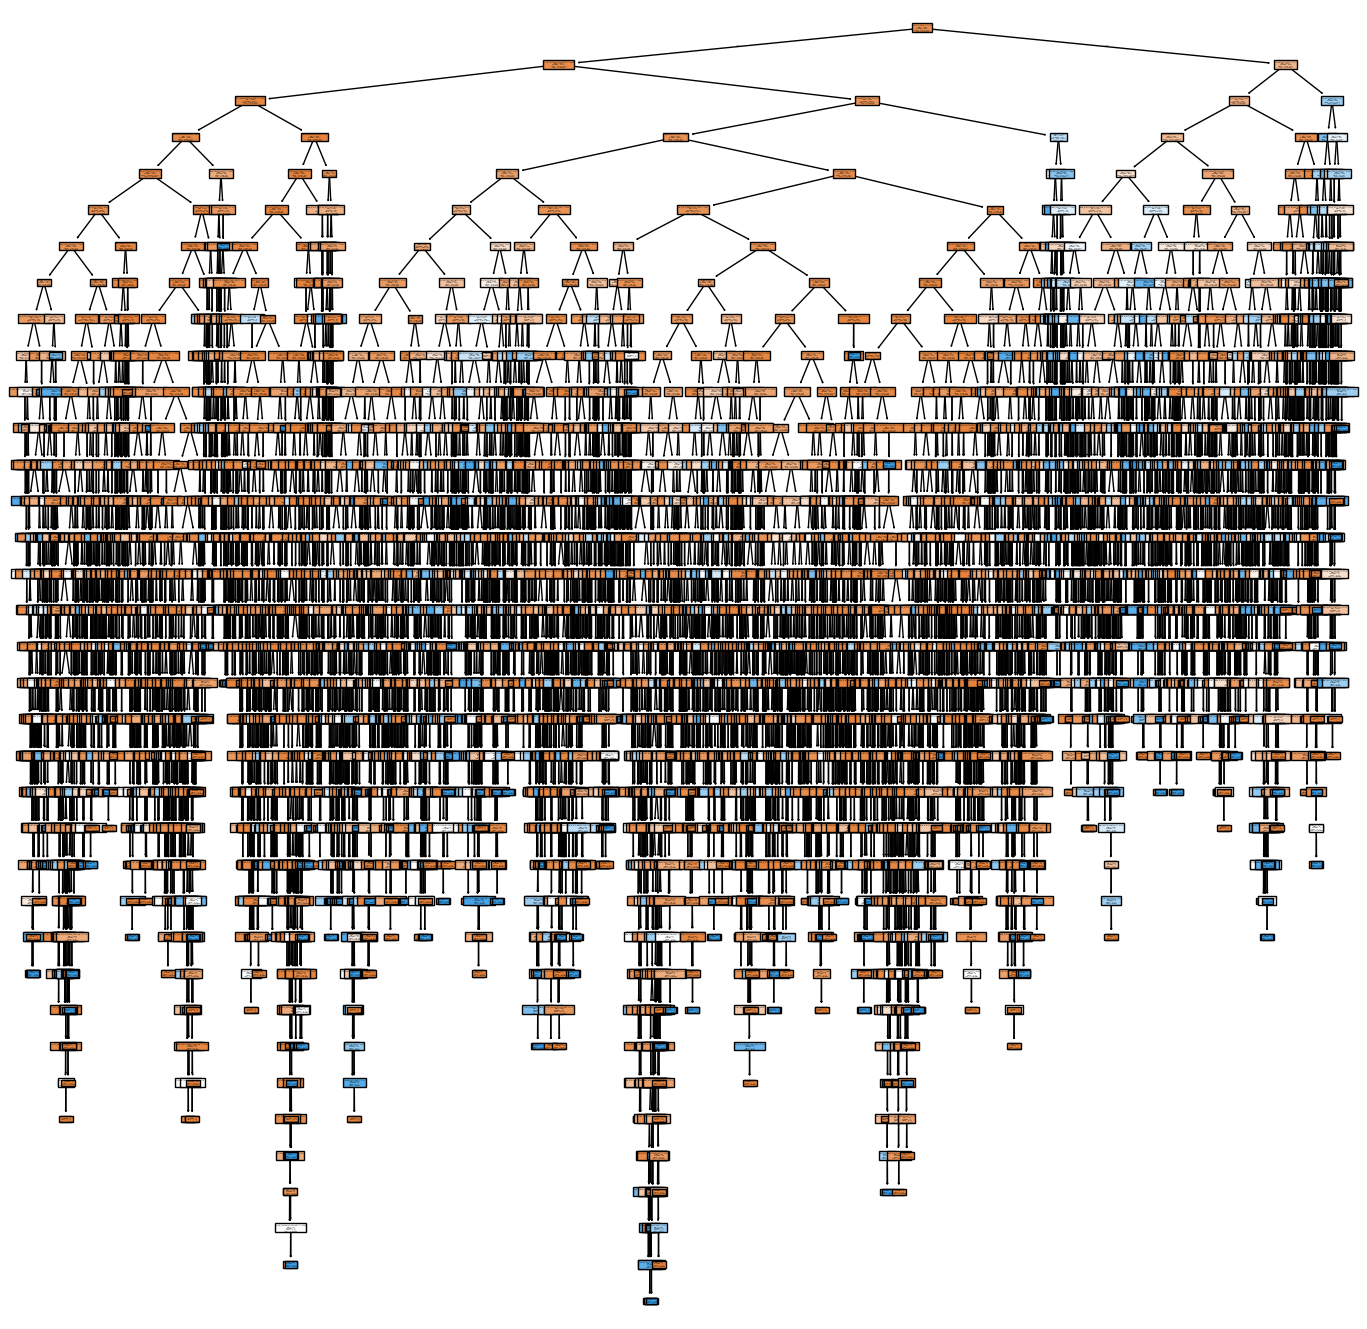

In [34]:
ig = plt.figure(figsize=(17,17))

tree.plot_tree(model1, feature_names = list(X_train_sel.columns), class_names = ["No Fraude", "Fraude"], filled = True)

plt.show()

# **PASO 8: EVALUACIÓN DE MODELO**

<br>

**EJECUTAMOS LA PREDICCIÓN DEL TEST DEL MODELO ORIGINAL**

In [60]:
print("--------------PREDICCIÓNN DEL TEST DEL MODELO ORIGINAL------------")
# predigo el test
y_pred_test = model1.predict(X_test_sel)
y_pred_test

--------------PREDICCIÓNN DEL TEST DEL MODELO ORIGINAL------------


array([0, 1, 1, ..., 0, 0, 0])

<br>

**EJECUTAMOS LA PREDICCIÓN DEL TRAIN DEL MODELO ORIGINAL** 

In [40]:
# predicción del train
y_pred_train = model1.predict(X_train_sel)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

<br>

**MEDICIÓN DE LOS DATOS DE ENTRENAMIENTO Y PRUEBA**

In [59]:
print("----------MEDICIÓN DE LOS DATOS DE ENTRENAMIENTO Y PRUEBA-------------")

# metricas el modelo inicial sin ajustes
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test Arbol inicial: ", accuracy_test)
print("F1 score Test Arbol inicial: ", f1_score_test)
print("Precision Test Arbol inicial: ", precision_test)
print("Recall Test Arbol inicial: ", recall_test)

print("Accuracy Train Arbol inicial: ", accuracy_train)
print("F1 score Train Arbol inicial: ", f1_score_train)
print("Precision Train Arbol inicial: ", precision_train)
print("Recall Train Arbol inicial: ", recall_train)

----------MEDICIÓN DE LOS DATOS DE ENTRENAMIENTO Y PRUEBA-------------
Accuracy Test Arbol inicial:  0.84625
F1 score Test Arbol inicial:  0.84625
Precision Test Arbol inicial:  0.84625
Recall Test Arbol inicial:  0.84625
Accuracy Train Arbol inicial:  1.0
F1 score Train Arbol inicial:  1.0
Precision Train Arbol inicial:  1.0
Recall Train Arbol inicial:  1.0


<br>

**COMPARACIÓN DE LAS METRICAS DE PRUEBA**

In [ ]:
print("----------COMPARACIÓN DE LAS MÉTRICAS DE PRUEBA-------------")
print(classification_report(y_test, y_pred_test, target_names=["No Fraude", "Fraude"]))

----------COMPARACIÓN DE LAS MÉTRICAS DE PRUEBA-------------
              precision    recall  f1-score   support

   No Fraude       0.92      0.90      0.91     17904
      Fraude       0.30      0.35      0.32      2096

    accuracy                           0.85     20000
   macro avg       0.61      0.63      0.62     20000
weighted avg       0.86      0.85      0.85     20000



<br>

**COMPARACIÓN DE LAS MÉTRICAS DEL ENTRENAMIENTO**

In [57]:
print("----------COMPARACIÓN DE LAS METRICAS DEL ENTRENAMIENTO-------------")
print(classification_report(y_train, y_pred_train, target_names=["No Fraude", "Fraude"]))

----------COMPARACIÓN DE LAS METRICAS DEL ENTRENAMIENTO-------------
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     71067
      Fraude       1.00      1.00      1.00      8933

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000




# **PASO 9: GUARDAR MODELO**

In [55]:
# Definir la ruta donde se guardará el modelo dentro de "src/models/"
ruta_modelo = 'src/models/modelo_Arbol_inicial.pkl'

# Verificar si el directorio "src/models/" existe, si no, crearlo
directorio = os.path.dirname(ruta_modelo)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)  # 'exist_ok=True' evita errores si el directorio ya existe

# Guardar el modelo
joblib.dump(model1, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: src/models/modelo_Arbol_inicial.pkl
